# ***Coloquio Integrador - Sistemas Dinámicos*** 💻🧉

Valentino Araya - Comisión 5 - Legajo 9938

* ***Temas Física I:*** Problema de rotación de un cuerpo rígido (Velocidad/Aceleración angular, Momento de Inercia, etc.).
* ***Temas AMI:*** Integrales definidas por distintos métodos (Suma de Riemann, Teorema Fundamental del cálculo), Derivadas (Funciones de posición, velocidad, aceleración), Extremos de funciones (Velocidad máxima/mínima alcanzada).
* ***Temas AyGA:*** Vectores (Operaciones entre vectores, módulo de vectores, ángulo entre vectores, etc.), Formas geométricas (Ecuación de una cónica, Ecuación de una cuádrica, etc.).

##Problema

###*En un parque de diversiones, los encargados de seguridad están provando la nueva atracción, una rueda de la fortuna.La rueda tiene radio de 12 m y masa de 7500 kg, parte del reposo con una aceleración tangencial constante de 1.2 m/s².*
* a) ¿Cuánto tiempo tardará en dar una vuelta completa?
* b) Si después de un instante el encargado frena la rueda por completo, y comienza a acelerarla nuevamente tal que su velocidad angular empieza a variar en función de ω(t) = -2t² + 6t ¿En qué momento alcanza su velocidad máxima? ¿De cuánto es esta velocidad en m/s?
* c) Después de que la rueda frene nuevamente, el encargado decide ver como se comporta ésta si el motor aplica una torca variable igual a τ(x) = 2x + 3 N*m (siendo x el desplazamiento en radianes), cada vez mayor. Calcule el trabajo ejercido por la torca en el intervalo de desplazamiento de [0, π/2].
* d) Considera una partícula sin masa que se mueve en el borde de la rueda durante el insiso a). Grafica la circunferencia de la rueda, luego el vector de velocidad, aceleración (tangengial y radial), y radio a los 8 segundos.
* e) Calcule el vector de aceleración, con su componente tangencial y radial, y el ángulo que forma con el vector de velocidad lineal.
* f) Se puede considerar a la rueda de la fortuna como un cilindro de pared delgada. Calcule su momento de inercia alrededor de un eje que pasa por su centro, luego grafíque el cilindro y dé la ecuación de la cuádrica.


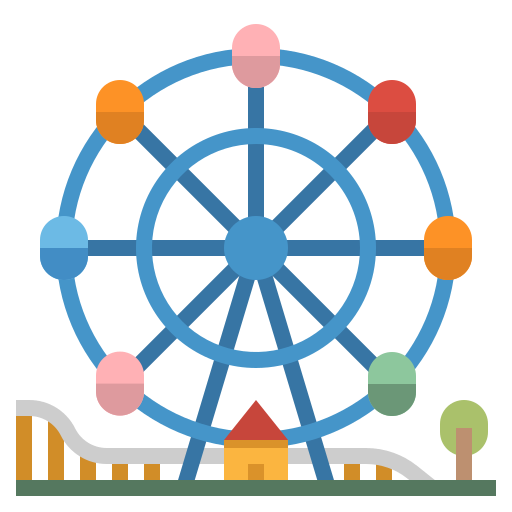

## Resolución

#### ***a) ¿Cuánto tiempo tardará en dar una vuelta completa?***

Aceleración angular -> α(t) = 0.09999999999999999 rad/s²
Velocidad angular -> ω(t) = 0.1*t rad/s
Posición -> θ(t) = 0.05*t**2 rad
 
a) El tiempo que tarda la rueda en dar una vuelta es 11.210 segundos.
 
Gráfico de las funciones: 


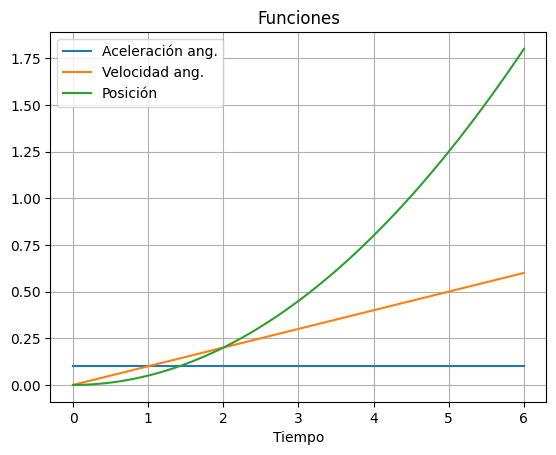

In [1]:
# Importamos los módulos para integrales
from sympy import integrate, init_printing
from sympy.abc import t
init_printing(use_latex="mathjax")

# Importamos los módulos para resolver ecuaciones
from sympy.solvers import solve
from sympy import Symbol

# Importo el número pi:
from math import pi

# Importamos los módulos para graficar las funciones
import matplotlib.pyplot as plt
import numpy as np

# Definimos las variables con los datos dados por el problema.
radio = 12 # radio en metros
actangencial = 1.2
masa = 7500

# Obtenemos la aceleración angular:
acangular = actangencial/radio
print(f'Aceleración angular -> α(t) = {acangular} rad/s²')

# Integramos directamente la aceleración angular para obtener la función de velocidad angular con respecto al tiempo:
ω = acangular*t + 0 # Parte del reposo, por lo que la velocidad inicial es 0
print(f'Velocidad angular -> ω(t) = {ω} rad/s')

# Integramos nuevamente con Python para obtener la función de posición con respecto al tiempo:
pos = integrate(ω)
print(f'Posición -> θ(t) = {pos} rad')

# Igualamos la función a 2π rad (una vuelta) y resolvemos con la función solve()
tiempo_vuelta = solve(pos-2*pi,t)[1]
print(" ")
print(f'a) El tiempo que tarda la rueda en dar una vuelta es {"{0:.3f}".format(tiempo_vuelta)} segundos.')

# Grafico funciones de aceleración, velocidad, y posición:
def aceleracion_angular(t): # Función de aceleración angular
  return (acangular)/t*t

def velocidad_angular(t): # Función de velocidad angular
  return acangular*t

def posicion(t): # Función de posición
  return (acangular/2)*(t**2)

print(" ")
print("Gráfico de las funciones: ")
x = np.linspace(0.0001,6,100)
plt.plot(x, aceleracion_angular(x), label="Aceleración ang.")
plt.plot(x, velocidad_angular(x), label="Velocidad ang.")
plt.plot(x, posicion(x), label="Posición")
plt.xlabel("Tiempo")
plt.title("Funciones")
plt.grid()
plt.legend()
plt.show()

#### ***b) Si después de un instante el encargado frena la rueda por completo, y comienza a acelerarla nuevamente tal que su velocidad angular empieza a variar en función de ω(t) = -2t² + 6t ¿En qué momento alcanza su velocidad máxima? ¿De cuánto es esta velocidad en m/s?***

La función derivada es ω'(t) = 6 - 4*t
t = 1.5 es un máximo absoluto (debido a que es una función cuadrática).
b) Por lo tanto, la rueda alcanza su velocidad máxima a los 1.5 segundos después de frenar por completo la rueda.
Y esa velocidad es de 4.5 rad/s, equivalente a 54.0 m/s.
 
Gráfico de las funciones: 


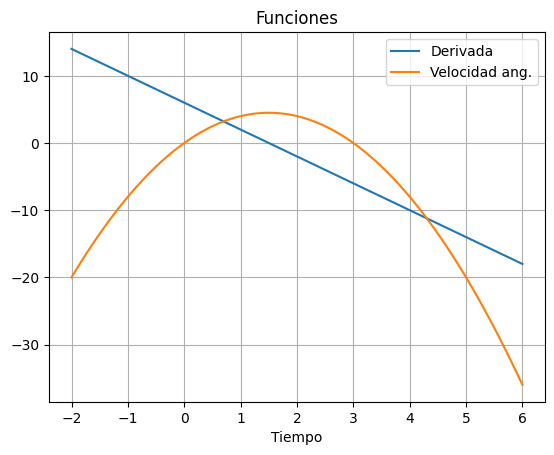

In [2]:
# Como vamos a buscar un máximo, importamos módulos para derivar
from sympy import diff

# Definimos la nueva función de velocidad angular
nueva_ω = -2*t**2+6*t

# Calculamos la derivada y buscamos el máximo absoluto:
ω_derivada = diff(nueva_ω,t)
valores_críticos = solve(ω_derivada,t) # La derivada es una función lineal, por lo que tiene solo un valor crítico.
print(f"La función derivada es ω'(t) = {ω_derivada}")

def velangular_derivada(t):
  return 6-4*t

def new_velangular(t):
  return -2*t**2+6*t

# Verifico si es un máximo:
if velangular_derivada(valores_críticos[0]-0.01) > 0 and velangular_derivada(valores_críticos[0]+0.01) < 0:
  print(f't = {float(valores_críticos[0])} es un máximo absoluto (debido a que es una función cuadrática).')
  print(f'b) Por lo tanto, la rueda alcanza su velocidad máxima a los {float(valores_críticos[0])} segundos después de frenar por completo la rueda.')
  print(f'Y esa velocidad es de {float(new_velangular(valores_críticos[0]))} rad/s, equivalente a {float(new_velangular(valores_críticos[0])*radio)} m/s.')

# Grafico las funciones:
print(" ")
print("Gráfico de las funciones: ")
x = np.linspace(-2,6,100)
plt.plot(x, velangular_derivada(x), label="Derivada")
plt.plot(x, new_velangular(x), label="Velocidad ang.")
plt.xlabel("Tiempo")
plt.title("Funciones")
plt.grid()
plt.legend()
plt.show()


#### ***c) Después de que la rueda frene nuevamente, el encargado decide ver como se comporta ésta si el motor aplica una torca variable igual a τ(x) = 2x + 3 N*m (siendo x el desplazamiento en radianes), cada vez mayor. Calcule el trabajo ejercido por la torca en el intervalo de desplazamiento de [0, π/2].***

c) El trabajo ejercido por la torca en el intervalo [0,π/2] por suma de Riemann es de 6.933 Joules aproximadamente.
El trebajo ejercido por la torca en el intervalo [0,π/2] por la integral calculada a mano es de 7.180 Joules.
El trabajo ejercido por la torca en el intervalo [0,π/2] es de 7.180 Joules.


Text(0.5, 1.0, 'Área:')

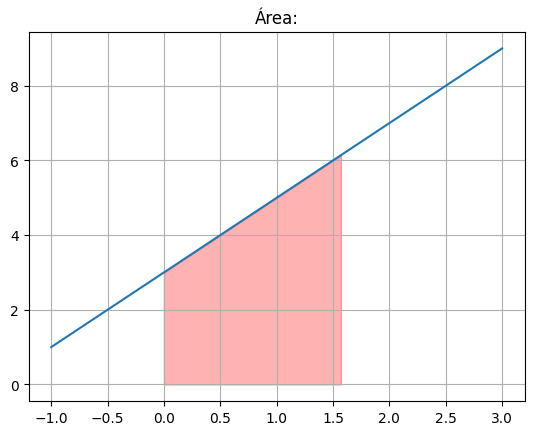

In [3]:
# El trabajo W total realizado es igual a la integral definida de la torca en el intervalo de posición dado.
# Aproximo el área de la torca en este intervalo con la Suma de Riemann:
from sympy.abc import x

def torca(x):
  return 2*x+3

intervalo = [0,pi/2]

def suma_de_riemann(intervalo):
  subintervalo = (intervalo[1]-intervalo[0])/10 # Defino 10 subintérvalos
  x = 0
  suma = 0
  for i in range(10):
      area = torca(x) * subintervalo
      suma = suma + area
      x = x + subintervalo
  return suma

trabajo_aproximado = suma_de_riemann(intervalo)

# Integral definida (Teorema fundamental del cálculo):
def integral_torca(x): # La función torca(x) se puede integrar directamente, por lo que calculo su integral:
  return x**2+3*x

integral_extremo_sup = integral_torca(intervalo[1])
integral_extremo_inf = integral_torca(intervalo[0])
area = integral_extremo_sup - integral_extremo_inf

# Integral Definida con Python
trabajo_exacto = integrate(torca(x), (x,intervalo[0],intervalo[1]))

# Respuestas
print(f'c) El trabajo ejercido por la torca en el intervalo [0,π/2] por suma de Riemann es de {"{0:.3f}".format(trabajo_aproximado)} Joules aproximadamente.') # Método 1 (Suma de Riemann)
print(f'El trebajo ejercido por la torca en el intervalo [0,π/2] por la integral calculada a mano es de {"{0:.3f}".format(area)} Joules.') # Método 2 (Teorema fundamental del cálculo)
print(f'El trabajo ejercido por la torca en el intervalo [0,π/2] es de {"{0:.3f}".format(trabajo_exacto)} Joules.') # Método 3 (Integral Definida por Python)

# Gráfico de la función:
x = np.linspace(-1,3,100)
x1 = np.linspace(intervalo[0],intervalo[1],100)
fig, ax = plt.subplots()
ax.plot(x, torca(x))
ax.fill_between(x1,0,torca(x1), color='r', alpha=0.3)
ax.grid()
ax.set_title("Área:")

#### ***d) Considera una partícula sin masa que se mueve en el borde de la rueda durante el insiso a). Grafica la circunferencia de la rueda, luego el vector de velocidad, aceleración (tangengial y radial), y radio a los 8 segundos. Luego exprese la ecuación de la circunferencia en forma ordinaria y general.***

La velocidad lineal a los 8 segundos es de 9.6 m/s


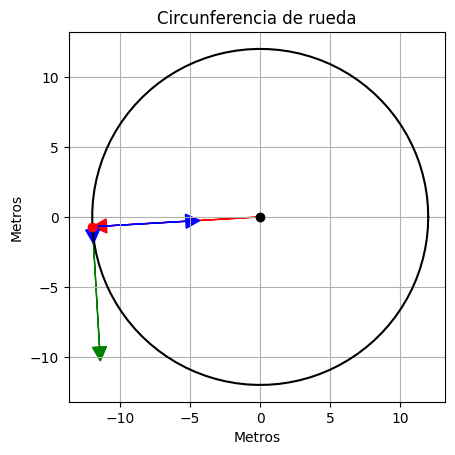

Al estar centrada en el origen, la ecuación ordinaria de la circunferencia es -> X² + Y² = 12²
La ecuación general de la circunferencia es -> X² + Y² - 144 = 0


In [4]:
def punto_pos(t):
  return [radio*np.cos(posicion(t)),radio*np.sin(posicion(t))]

def punto_vel(t):
  vel_lineal = radio*velocidad_angular(t)
  print(f'La velocidad lineal a los 8 segundos es de {"{0:.1f}".format(vel_lineal)} m/s')
  # Se suman pi/2 rad o 90 grados a la función coseno y seno debido al ángulo que forma con el radio la velocidad.
  vel_linealX = vel_lineal*np.cos(posicion(t)+pi/2) # Componente en X de la velocidad.
  vel_linealY = vel_lineal*np.sin(posicion(t)+pi/2) # Componente en Y de la velocidad.
  return [vel_linealX, vel_linealY]

def punto_ac_rad(t):
  ac_rad = (velocidad_angular(t)**2)*radio
  ac_radX = ac_rad*np.cos(posicion(t)+pi)
  ac_radY = ac_rad*np.sin(posicion(t)+pi)
  return [ac_radX, ac_radY]

def punto_ac_tan(t):
  ac_tanX = 1.2*np.cos(posicion(t)+pi/2)
  ac_tanY = 1.2*np.sin(posicion(t)+pi/2)
  return [ac_tanX, ac_tanY]

punto_p = punto_pos(8) # Posición a los 8 segundos.
punto_v = punto_vel(8) # Velocidad a los 8 segundos.
punto_ar = punto_ac_rad(8) # Aceleración radial a los 8 segundos.
punto_at = punto_ac_tan(8) # Aceleración tangencial a los 8 segundos.

# Gráfico de la circunferencia y vectores

def plot_vector(vector, origen, **options):
  return plt.arrow(origen[0], origen[1], vector[0], vector[1],
                   head_width=1, head_length=1, length_includes_head=True,
                   **options)

angulo = np.linspace(0, 2*np.pi, 100)
x = radio * np.cos(angulo) #Posición en X
y = radio * np.sin(angulo) #Posición en Y
plt.plot(x, y, color="black")
plt.plot(0,0, marker="o", color="black")
plt.plot(punto_p[0],punto_p[1], marker="o", color="red") # Partícula
plot_vector(punto_p,[0,0], color="red") # Gráfico posición a los 8 segundos.
plot_vector(punto_v, punto_p, color='g') # Gráfico velocidad a los 8 segundos.
plot_vector(punto_ar, punto_p, color='b') # Gráfico acekeración radial a los 8 segundos.
plot_vector(punto_at, punto_p, color='b') # Gráfico aceleración tangencial a los 8 segundos.
plt.title("Circunferencia de rueda")
plt.xlabel("Metros")
plt.ylabel("Metros")
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

# Ecuación de la circunferencia:
print(f'Al estar centrada en el origen, la ecuación ordinaria de la circunferencia es -> X² + Y² = {radio}²')
print(f'La ecuación general de la circunferencia es -> X² + Y² - {radio**2} = 0')

#### ***e) Calcule el vector de aceleración, con su componente tangencial y radial, y el ángulo que forma con el vector de velocidad lineal.***

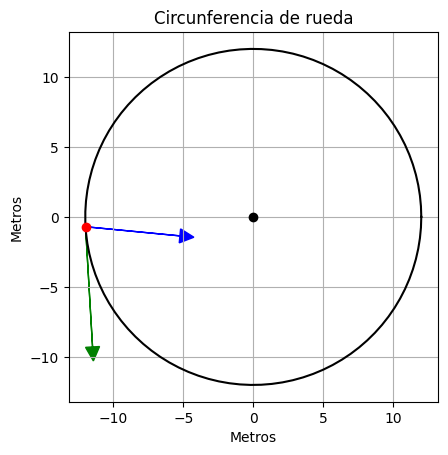

e) El ángulo que forma el vector velocidad con el de aceleración es de 1.416 rad o 81.1°.


In [5]:
#Grafico nuevamente:
plt.plot(x, y, color="black")
plt.plot(0,0, marker="o", color="black") # Centro
plt.plot(punto_p[0],punto_p[1], marker="o", color="red") # Gráfico posición a los 8 segundos.
plot_vector(punto_v, punto_p, color='g') # Gráfico velocidad a los 8 segundos.

# Calculo el vector de aceleración:
ac = [punto_ar[0]+punto_at[0], punto_ar[1]+punto_at[1]] # Vector aceleración

# Grafico el vector:
plot_vector(ac, punto_p, color='b') # Gráfico aceleración a los 8 segundos.
plt.title("Circunferencia de rueda")
plt.xlabel("Metros")
plt.ylabel("Metros")
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

# Calculo el ángulo entre los vectores:
def modulo_vector(vector):
  modulo = np.sqrt(vector[0]**2 + vector[1]**2)
  return modulo

def producto_punto(vector1, vector2):
  suma = vector1[0]*vector2[0] + vector1[1]*vector2[1]
  return suma

def angulo_entre_vectores(vector1, vector2):
  prodp = producto_punto(vector1, vector2)
  prodm = modulo_vector(vector1) * modulo_vector(vector2)
  coseno_alpha = prodp/prodm
  angulo_rads = np.arccos(coseno_alpha)
  return angulo_rads

print(f'e) El ángulo que forma el vector velocidad con el de aceleración es de {"{0:.3f}".format(angulo_entre_vectores(ac,punto_v))} rad o {"{0:.1f}".format(angulo_entre_vectores(ac,punto_v)*180/pi)}°.')



#### ***f) Se puede considerar a la rueda de la fortuna como un cilindro de pared delgada. Calcule su momento de inercia alrededor de un eje que pasa por su centro, luego grafíque el cilindro y dé la ecuación de la cuádrica.***

El momento de inercia de la rueda de la fortuna es 1080000 kg.m²


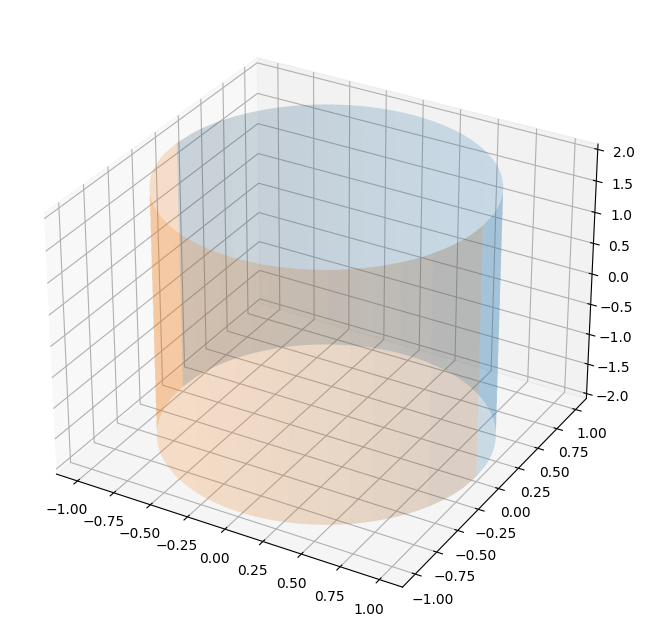

La ecuación de la superficie cilíndrica de radio de 12 metros, centrada en el origen es -> X² + Z² = 12²


In [ ]:
# Calculamos el momento de inercia:
momento_inercia = masa*(radio**2)
print(f"El momento de inercia de la rueda de la fortuna es {momento_inercia} kg.m²")

# Grafico el cilindro:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

# grid del cilindro
x=np.linspace(-1, 1, 200)
z=np.linspace(-2, 2, 200)
Xc, Zc=np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)

# Plot del cilindro
ax.plot_surface(Xc, Yc, Zc, alpha=0.2, rstride=10, cstride=10)
ax.plot_surface(Xc, -Yc, Zc, alpha=0.2, rstride=10, cstride=10)

plt.show()

print(f'La ecuación de la superficie cilíndrica de radio de 12 metros, centrada en el origen es -> X² + Z² = {radio}²')